In [3]:
import vectorbt as vbt
import pandas as pd 
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt


print('https://vectorbt.dev/api/returns/qs_adapter/')


/Users/chenyoulun/anaconda3/envs/Allen/lib/python3.8/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


https://vectorbt.dev/api/returns/qs_adapter/


In [4]:
price = vbt.YFData.download('BTC-USD').get('Close')

fast_ma = vbt.MA.run(price, 10)
slow_ma = vbt.MA.run(price, 50)
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)

pf = vbt.Portfolio.from_signals(price, entries, exits, init_cash=100)
#pf.plot().show()


In [3]:
pf.assets()

Date
2014-09-17 00:00:00+00:00    0.0
2014-09-18 00:00:00+00:00    0.0
2014-09-19 00:00:00+00:00    0.0
2014-09-20 00:00:00+00:00    0.0
2014-09-21 00:00:00+00:00    0.0
                            ... 
2023-09-26 00:00:00+00:00    0.0
2023-09-27 00:00:00+00:00    0.0
2023-09-28 00:00:00+00:00    0.0
2023-09-29 00:00:00+00:00    0.0
2023-09-30 00:00:00+00:00    0.0
Freq: D, Length: 3301, dtype: float64

In [4]:
pf.orders.records_readable


,Order Id,Column,Timestamp,Size,Price,Fees,Side
0,0,0,2014-11-14 00:00:00+00:00,0.251371,397.817993,0.0,Buy
1,1,0,2014-11-29 00:00:00+00:00,0.251371,375.490997,0.0,Sell
2,2,0,2014-11-30 00:00:00+00:00,0.249672,378.046997,0.0,Buy
3,3,0,2014-12-13 00:00:00+00:00,0.249672,347.376007,0.0,Sell
4,4,0,2015-02-21 00:00:00+00:00,0.354674,244.533997,0.0,Buy
...,...,...,...,...,...,...,...
71,71,0,2023-03-07 00:00:00+00:00,0.697466,22219.769531,0.0,Sell
72,72,0,2023-03-18 00:00:00+00:00,0.574709,26965.878906,0.0,Buy
73,73,0,2023-05-10 00:00:00+00:00,0.574709,27621.755859,0.0,Sell
74,74,0,2023-06-23 00:00:00+00:00,0.517160,30695.468750,0.0,Buy


In [5]:
fig = price.vbt.plot(trace_kwargs=dict(name='Close'))
fast_ma.ma.vbt.plot(trace_kwargs=dict(name='Fast MA'), fig=fig)
slow_ma.ma.vbt.plot(trace_kwargs=dict(name='Slow MA'), fig=fig)
pf.positions.plot(close_trace_kwargs=dict(visible=False), fig=fig)

FigureWidget({
    'data': [{'name': 'Close',
              'showlegend': True,
              'type': 'scatter',
              'uid': '2d10a6fc-a41b-4773-b011-f8204d9dd14c',
              'x': array([datetime.datetime(2014, 9, 17, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2014, 9, 18, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2014, 9, 19, 0, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2023, 9, 28, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 29, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 9, 30, 0, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'y': array([  457.33401489,   424.44000244,   394.79598999, ..., 27021.546875  ,
                          26911.72070312, 26938.97070312])},
             {'name': 'Fast MA',
              'showlegend':

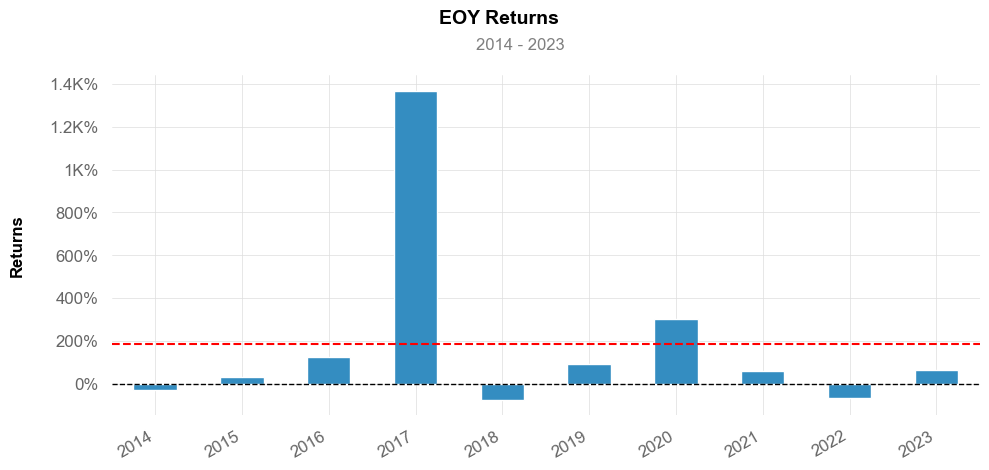

In [6]:
returns = price.vbt.to_returns()
returns.vbt.returns.qs.plot_yearly_returns()

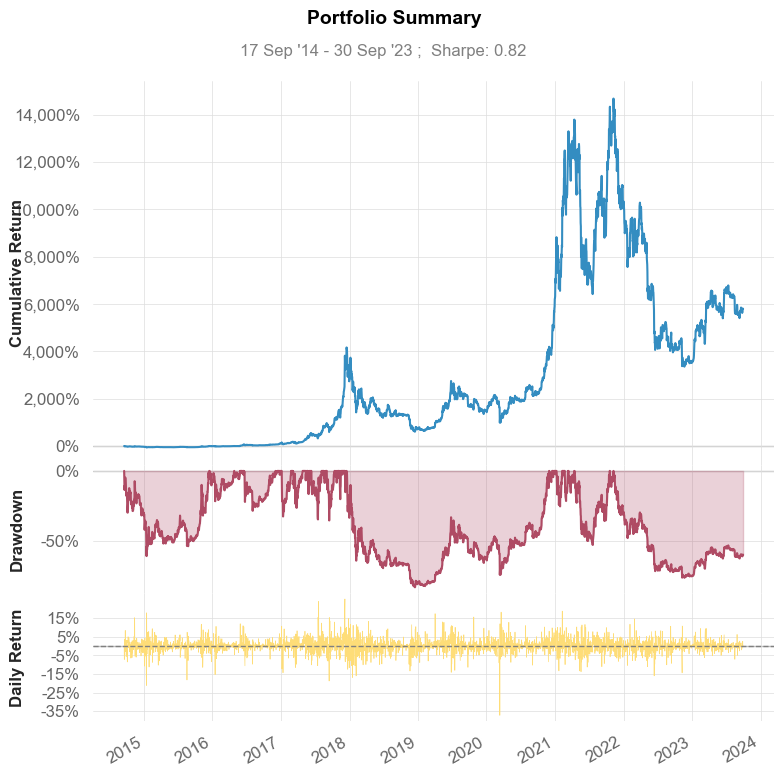

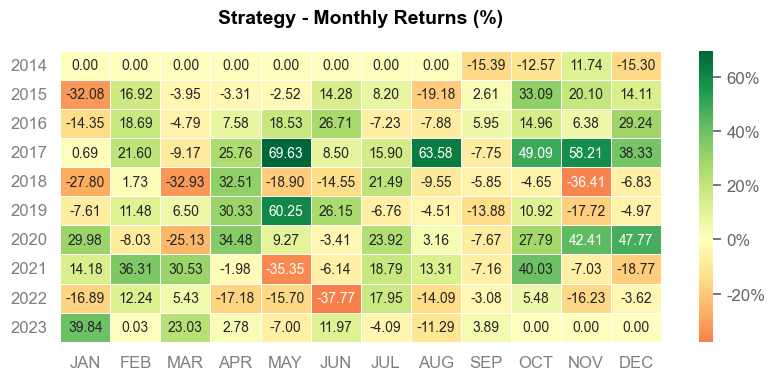

In [7]:
returns.vbt.returns.qs.plots_report()

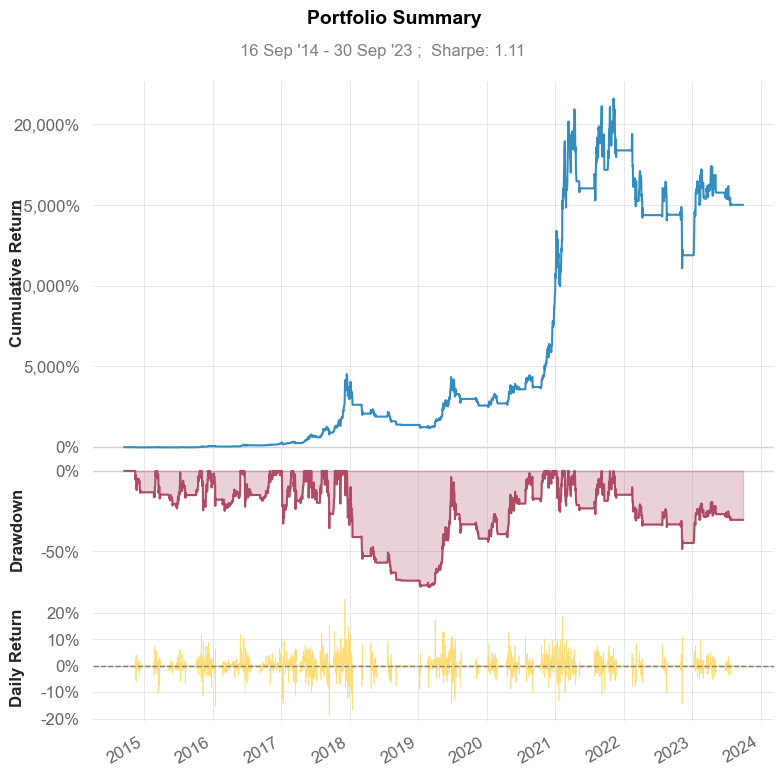

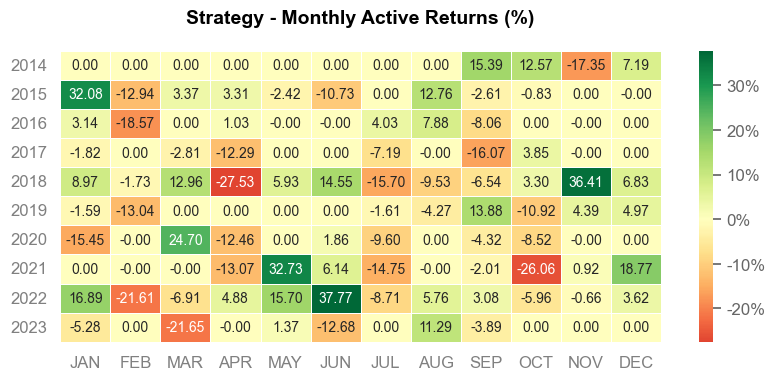

In [57]:
#vbt.settings.array_wrapper.freq = 'D'

pf.qs.plots_report()


IndexError: index 0 is out of bounds for axis 0 with size 0

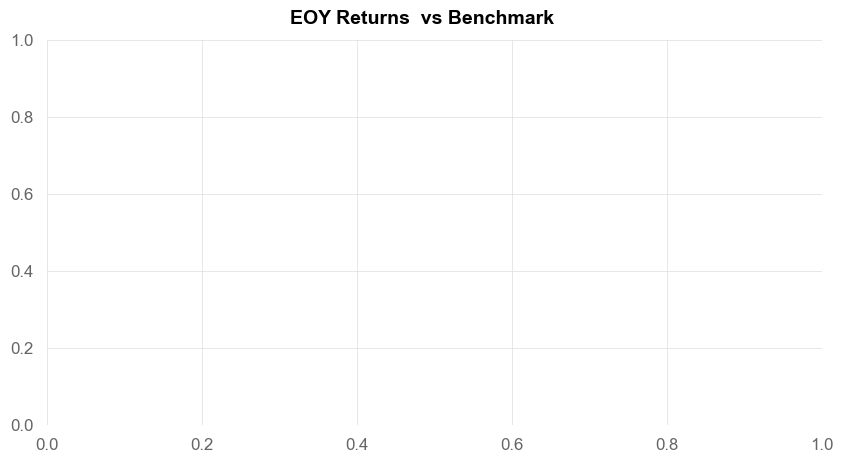

In [6]:
pf.qs.plot_yearly_returns()


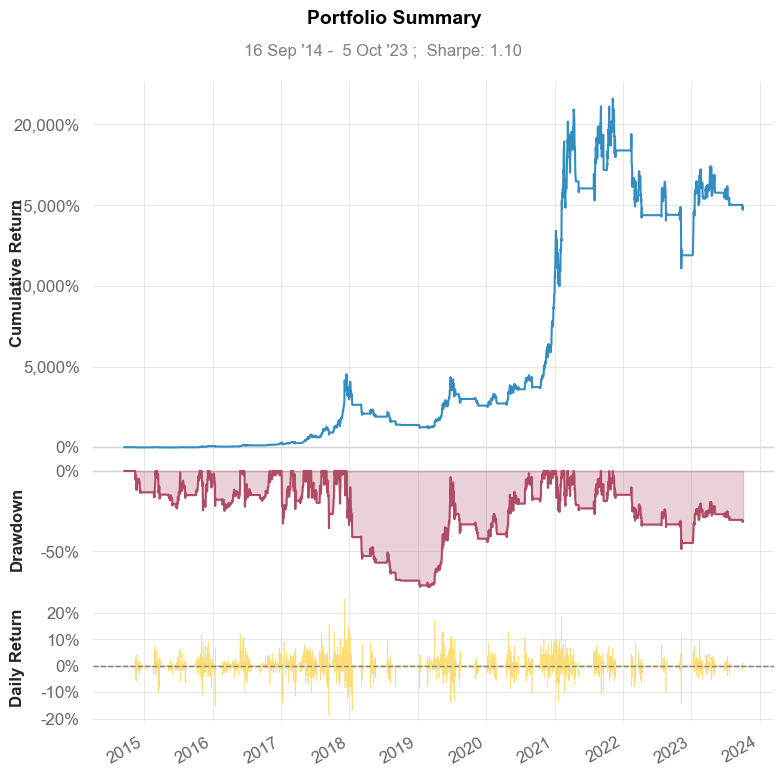

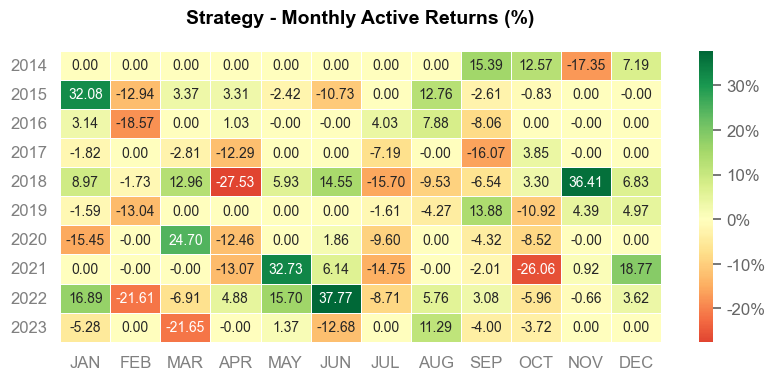

In [5]:
show_stats(pf)

In [52]:
returns.vbt.returns.qs.plot_monthly_returns()

TypeError: 'bool' object is not subscriptable

In [50]:
1913*3

5739

In [1]:
def show_stats(pf):
    """
    Show a plots report for a given portfolio using QuantStats.

    Parameters:
    pf (QuantStats): The QuantStats portfolio object to generate a plots report for.
    type of pf :<vectorbt.portfolio.base.Portfolio at 0x14af11f40>

    Returns:
    None
    """
    vbt.settings.array_wrapper.freq = 'D'
    pf.qs.plots_report()
    return None
